In [36]:
import pandas as pd

df_data = pd.read_excel('C:/Users/09368/workspace/data/excel/Article_economy_202101_202104.xlsx')

print(len(df_data))

title  = df_data['title'].values.tolist()
body   = df_data['body'].values.tolist()
date   = df_data['date'].values.tolist()
source = df_data['source'].values.tolist()

18472


### LDA Topic Modeling
##### 다양한 키워드를 기반으로 내용을 유형화(그룹화)시켜, 단어나 문서의 숨겨진 주제(TOPIC)을 찾아냄

##### 명사 추출 (konlpy)

In [37]:
from konlpy.tag import Kkma
import re
from string import punctuation
import time
import datetime

start = time.time()
kkma  = Kkma()

dataset = []

test_title = title[:1000]

# 구두점 제거
def strip_puncuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for title in test_title:
    clean = strip_puncuation(title)
    clean_title.append(clean)
    
for i in range(len(clean_title)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\\s]','', clean_title[i])))

# processing time
sec   = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

0:00:30


In [7]:
#pip install C:/gensim-4.0.1-cp38-cp38-win_amd64.whl

##### Corpus Dictionary 언어모델 형성 (gensim)

In [38]:
# 단어의 비중이 너무 큰 의미없는 단어 제거
# 토픽모델링(pyLDAvis) 시각화 이후, 다시 전처리
clean_title2 = []
for i in range(len(clean_title)):
    clean_title2.append(re.sub('새해','',clean_title[i]))
    
clean_title3 = []
for i in range(len(clean_title)):
    clean_title3.append(re.sub('신년','',clean_title2[i]))
    
clean_title4 = []
for i in range(len(clean_title)):
    clean_title4.append(re.sub('올해','',clean_title3[i]))
    
clean_title5 = []
for i in range(len(clean_title)):
    clean_title5.append(re.sub('지난해','',clean_title4[i]))

dataset = []
for i in range(len(clean_title)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\\s]','', clean_title5[i])))

In [39]:
from gensim import corpora, models # LDA 적용을 위한 텍스트의 벡터화
import gensim

high_score_reviews = dataset

high_score_reviews = [[y for y in x if not len(y) == 1]
                      for x in high_score_reviews]

# 데이터를 dictionary형태로 명사 리스트 만들기
dictionary = corpora.Dictionary(high_score_reviews)

# vector로 변환한 bag of words(corpus) 결과물
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(4, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)]]


##### CoherenceModel 을 통한 모델 평가 및 토픽 최적화

In [40]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

"""
CoherenceModel 을 통한 토픽 최적화

토픽이 얼마나 의미론적으로 일관성 있는지 판단. 높을수록 의미론적 일관성 높음
주 용도: 해당 모델이 얼마나 실제로 의미 있는 결과를 내는지 확인
"""

coherence_values = []
for i in range(2, 15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    

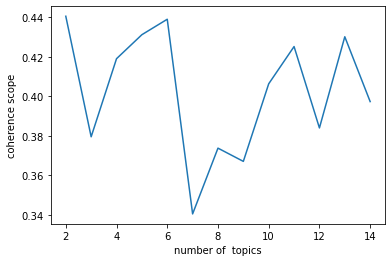

In [41]:
x = range(2, 15)

plt.plot(x, coherence_values)
plt.xlabel("number of  topics")
plt.ylabel("coherence scope")
plt.show()

#####  LDA 시각화

In [42]:
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, alpha=0.1, id2word=dictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.027*"수출" + 0.015*"작년" + 0.010*"증가" + 0.010*"연간" + 0.009*"최고" + 0.009*"달러" + 0.006*"사상" + 0.005*"경제" + 0.005*"주식" + 0.005*"증가작년" + 0.005*"감소" + 0.004*"삼성" + 0.004*"전시" + 0.004*"투자" + 0.004*"세계" + 0.004*"성적표" + 0.004*"대면" + 0.004*"제품" + 0.004*"실적" + 0.004*"시대"'),
 (1,
  '0.016*"수출" + 0.012*"코스" + 0.012*"최고" + 0.011*"코스피" + 0.009*"사상" + 0.007*"시가총액" + 0.007*"개미" + 0.007*"총액" + 0.007*"시가" + 0.006*"지원" + 0.006*"작년" + 0.006*"유통" + 0.006*"달러" + 0.005*"경제" + 0.005*"할인" + 0.005*"상승" + 0.005*"최초" + 0.005*"생활" + 0.004*"생필품" + 0.004*"수출액"'),
 (2,
  '0.011*"수출" + 0.007*"인천" + 0.006*"증가" + 0.006*"터미널" + 0.006*"지원" + 0.006*"한진" + 0.006*"컨테이너" + 0.005*"연금" + 0.005*"최고" + 0.004*"코로나" + 0.004*"경기" + 0.004*"강원" + 0.004*"수익" + 0.004*"국민" + 0.004*"국민연금" + 0.004*"최대" + 0.004*"속보" + 0.004*"농업" + 0.004*"보험료" + 0.004*"인천신항한진"'),
 (3,
  '0.012*"코로나" + 0.007*"병원성" + 0.007*"농장" + 0.007*"수출" + 0.006*"코스" + 0.006*"코스피" + 0.006*"개미" + 0.006*"백신" + 0.005*"역대" + 0.005*"최고" + 0.005*"최대" + 0.005*"연금" + 0.005*"

In [43]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.137676  0.003061       1        1  13.233706
8     -0.047195 -0.045720       2        1  12.101672
1      0.042912 -0.125291       3        1  11.956976
5     -0.006353  0.013543       4        1  10.042272
4     -0.021507 -0.029690       5        1  10.034770
3      0.072660 -0.044266       6        1   9.633766
0     -0.055804 -0.008881       7        1   8.813062
9      0.127920  0.037708       8        1   8.134739
2      0.052038  0.080615       9        1   8.065402
7     -0.026995  0.118921      10        1   7.983636, topic_info=    Term       Freq      Total Category  logprob  loglift
66    수출  97.000000  97.000000  Default  30.0000  30.0000
622   코스  16.000000  16.000000  Default  29.0000  29.0000
623  코스피  15.000000  15.000000  Default  28.0000  28.0000
753   정신  20.000000  20.000000  Default  27.0000  27.0000
100   작년  21.000000  21.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
652   마감   2.085813  16.100519  Topic10  -5.6249   0.4841
183  코로나   2.758101  59.429899  Topic10  -5.3455  -0.5425
751   사회   2.085284  20.633543  Topic10  -5.6251   0.2358
655   증시   2.085427  21.467397  Topic10  -5.6250   0.1962
653   사상   2.085437  24.004773  Topic10  -5.6250   0.0845

[717 rows x 6 columns], token_table=      Topic      Freq Term
term                      
468       2  0.287871   가격
468       3  0.143936   가격
468       6  0.143936   가격
468       9  0.143936   가격
468      10  0.431807   가격
...     ...       ...  ...
54        9  0.033321   회장
54       10  0.166606   회장
2592      6  0.738738   후추
1614      2  0.760613   흑자
1614      9  0.152123   흑자

[1425 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 2, 6, 5, 4, 1, 10, 3, 8])

##### 토픽에 할당된 키워드 추출 (Topic-Keyword)

In [49]:
"""
각 토픽에 할당된 단어와 단어별 토픽 차지 비율 추출
"""

kk = ldamodel.show_topic(9, topn=8000)
type(ldamodel.show_topic)

kk2=pd.DataFrame(kk)
kk2.head(50)

,0,1
0,현대,0.008738
1,맞이,0.008738
2,현대차,0.006579
3,극적,0.006565
4,인천,0.005501
5,컨테이너,0.005500
6,론쇼,0.005500
7,타결,0.005485
8,판매,0.004423
9,신규,0.004423
